<a href="https://colab.research.google.com/github/Preranakh/Advanced-NLP/blob/main/Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is for fine tuning bert for text classification and sentiment analysis using tensorflow 2 and tensorflow hub,
detect toxic content online
For this we have use the datatset from quora that contains questions asked on the quora platform
insincere questions, these can inlcude agreesive , inflammatory questions or sexual content for shock value and so on, the goal is to predict whether the sentences are insincere or not
if the question is insincere, its labelled as 1 , if its non toxic and sincere, it is labelled as zero
embedding of each token has content, both from right to the token adn left to the token
Bert has revolutionized natural language processing
Bert is pre trained for 2 main task-mask language model and next sentence prediction, it is a transformer model



some preprocessing steps are required

we are not going to do any additional preprocessing manually

because the helper functions and submodules from official module repository is going to help us with pre processing, to get the text data into input format as required by the BERT

we are going to use the pre trained model and use that for our domain specific task, and fine tune the model

dataset here: kaggle.com/c/quora-insincere-questions-classification/data

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [ ]:
!nvidia-smi

Sat Dec 30 17:13:43 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

latest is Tesla T4 GPU by CUDA, we have to make sure that GPU is enabled

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.15.0


In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



this to clone the official tensorflow model from github, this contains models for computer vision and NL, but we are going to use submodules and helper functions that are relevant to BERT

In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.15.0
Eager mode:  True
Hub version:  0.15.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



In [ ]:
df=pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip', compression='zip', low_memory=False)

In [ ]:
df.shape

(1306122, 3)

the dataset has 3 columns one for question id, question text and questions label, we have 1.3 million rows in our dataset
trying to fine tune this with a single gpu takes more than 8 hours

In [ ]:
df. tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


our target label is binary

<Axes: title={'center': 'Target distribution'}, ylabel='Frequency'>

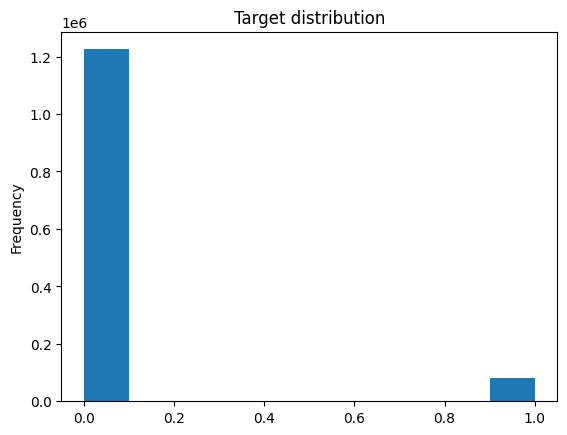

In [ ]:
df.target.plot(kind='hist', title='Target distribution')

It is a highly skewed graph where we have a clear class imbalance problem, the majority of the questions are sincere here i.e label =0, to address this imbalance we will use some stratification techniques, we will sample from the original dis such that this imbalance is maintained in both the splits in both training and validation data

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
train_df, remaining=  train_test_split (df, random_state=42, train_size=0.0075, stratify=df.target.values)

In [ ]:
valid_df, _ = train_test_split (remaining, random_state=42, train_size=0.00075, stratify= remaining.target. values)

I want 10,000 and close to 1000 for validation data.

In [20]:
train_df.shape, valid_df. shape

((9795, 3), (972, 3))

BERT is really expensive to Train, because it has 109 million parameters

we will learn how to use tf.api data for efficient input pipelines and preprocessing of text data for NLP tasks

this is for the input data pipleine

needed because doe to large number of parameters present and the I/O bottleneck

t.data api can help us with this, one of the learning objective is to use tf.data api for input data pipelines for nlp tasks, we will be use this api, it is linked in the notebook itself

During training many input elements need to be pre processed, since many input elements have to be processed, the api provides the data transformation and the user defined functions, the pro processing can be parallelized across the multiple CPU cores which we will do in the later steps in the code, do all the preprocessing step in the CPU such that there is no GPU overhead

for this we will use the tensor_slices

In [24]:
with tf.device('/cpu:0'):
  train_data=tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  valid_data= tf.data.Dataset.from_tensor_slices((valid_df.question_text.values, valid_df.target.values ))

  for text, label in train_data.take(1):
     print(text)
     print(label)



tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [28]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

 # Label categories
label_list= [0,1]
 # maximum length of (token) input sequences
max_seq_length=128
train_batch_size=32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2



now we will download the pre trained model form google from the tensorflow hub,
it has 12 blocks,
it return contextualized embeddings



In [29]:
bert_layer = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/2",
                            trainable=True)

it is best practice to fine tune all the hyperparamters in the model, so we set trainable=True

In [31]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

the above codes can be found in the documentation of tensorflow hub

In [32]:
tokenizer.wordpiece_tokenizer.tokenize('hi,how are you doing')

['hi', '##,', '##how', 'are', 'you', 'doing']

yes we saw a comma but it was also attached to other token, double ## sign mean that

In [33]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi,how are you doing'))

[7632, 29623, 14406, 2024, 2017, 2725]

each sentence or sequence contains 2 specialized tokens\

steps so far only create the instances of tokenizer

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

each sequence has to be padded, BERT is actually doing contextualized embedding, input mask is the vector of same length i.e max seq length,

In [34]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example=classifier_data_lib.InputExample(guid= None, text_a=text.numpy(), text_b=None, label=label.numpy())
  feature=classifier_data_lib.convert_single_example(0,example, label_list, max_seq_length,
                                                     tokenizer)
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature. label_id)





You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/

data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [37]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id=tf.py_function(to_feature, inp=[text, label],
                                                              Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])
  x={
      'input_word_ids':input_ids,
      'input_mask':input_mask,
      'input_type_ids': segment_ids
  }
  return (x,label_id)



the above code is to convert graph tensor into regular tensor

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [38]:
with tf.device('/cpu:0'):
  # train
  train_data=(train_data.map(to_feature_map, num_parallel_calls= tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data=(valid_data.map(to_feature_map, num_parallel_calls= tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE)
  )

the above code is tensorflow input pipeline

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [39]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [41]:
# valid data spec
valid_data.element_spec


({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [59]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_type_ids")
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
  drop=tf.keras.layers.Dropout(0.4)(pooled_output)
  output=tf.keras.layers.Dense(1, activation='sigmoid', name= "output")(drop)
  model=tf.keras.Model(
      inputs={
      'input_word_ids':input_word_ids,
      'input_mask':input_mask,
      'input_type_ids': input_type_ids
  } ,
      outputs=output)
  return model


this way we get the pooled output from the model

half of the above code is from the documentation of tf hub

## Task 10: Fine-Tune BERT for Text Classification

In [84]:
model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()]
              )
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                            

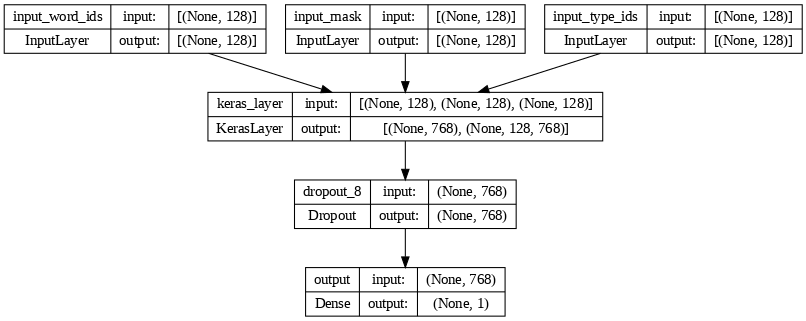

In [85]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

In [86]:
# Train model
epochs=4
history=model.fit(train_data, validation_data=valid_data, epochs=epochs, verbose=1)


Epoch 1/4
306/306 [==============================] - 267s 774ms/step - loss: nan - binary_accuracy: 0.9381 - val_loss: nan - val_binary_accuracy: 0.9385
Epoch 2/4
306/306 [==============================] - 234s 761ms/step - loss: nan - binary_accuracy: 0.9381 - val_loss: nan - val_binary_accuracy: 0.9385
Epoch 3/4
306/306 [==============================] - 237s 771ms/step - loss: nan - binary_accuracy: 0.9381 - val_loss: nan - val_binary_accuracy: 0.9385
Epoch 4/4
306/306 [==============================] - 234s 760ms/step - loss: nan - binary_accuracy: 0.9382 - val_loss: nan - val_binary_accuracy: 0.9385


## Task 11: Evaluate the BERT Text Classification Model

In [73]:
# prompt: why the loss here and val loss is empty, please fix the code

model.evaluate(valid_data, verbose=1)


30/30 [==============================] - 8s 248ms/step - loss: nan - binary_accuracy: 0.9385


[nan, 0.9385416507720947]

In [87]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

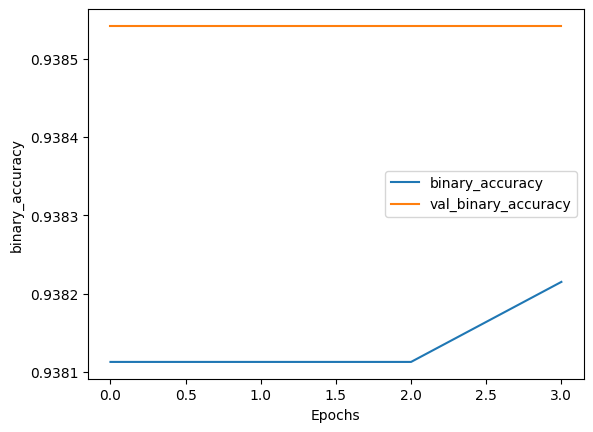

In [90]:
plot_graphs(history, 'binary_accuracy')

we have the overfitting here
try how not to overfit in the case of BERT
